In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from statistics import mode 
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [2]:
data=np.float64(np.load('MNIST.npy'))
labels=np.float32(np.load('MNIST_labels.npy'))

In [3]:
print(data.shape)
print(labels.shape)

(70000, 784)
(70000,)


In [4]:
data = data / 255

In [5]:
data_train, data_test, label_train, label_test = train_test_split(data, labels, 
        test_size = 0.4, random_state = 1)
data_dev, data_test, label_dev, label_test = train_test_split(data_test, label_test, 
        test_size = 0.5, random_state = 1) 

In [6]:
def show_image(nrows, ncols, figures):
    plt.figure(figsize = (ncols * 2, nrows * 2))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(figures[i].reshape((28, 28)), cmap = "gray")
        plt.axis("off")
    
    plt.axis("off")
    plt.show()

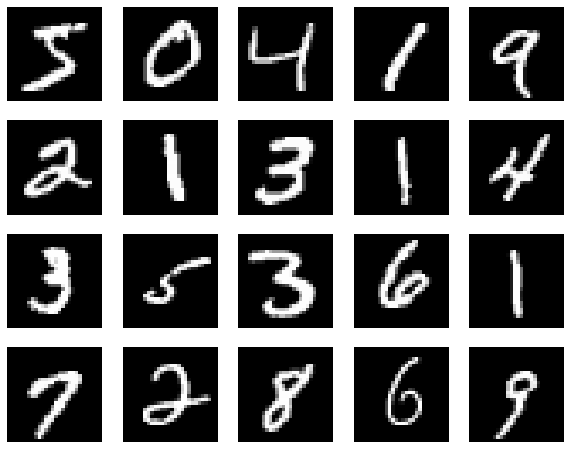

In [7]:
show_image(4, 5, data)

In [8]:
#PCA 

In [9]:
#(a)

In [10]:
# Find X_tilde = X - X_bar 

In [11]:
def center_data(data):
    x_bar = np.mean(data, axis = 0)
    return data - x_bar

In [12]:
# Compute covariance matrix s = 1/n(sum(x_tilde * (x_tilde)T))

In [13]:
def compute_covariance(data):
    centered_data = center_data(data)
    return np.cov(centered_data.T)

In [14]:
# Extract eigenvalues, eigenvectors of S 

In [15]:
def extract_eigen(data, k):
    cov = compute_covariance(data)
    e_values, e_vectors = np.linalg.eig(cov)
    e_values = list(e_values)
    top_k_e_values = sorted(e_values, reverse = True)[:k]
    k_principal = []
    for e in top_k_e_values:
        index = e_values.index(e)
        e_vec = e_vectors[:, index]
        k_principal.append(e_vec)
    
    return np.array(k_principal).astype("float")
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


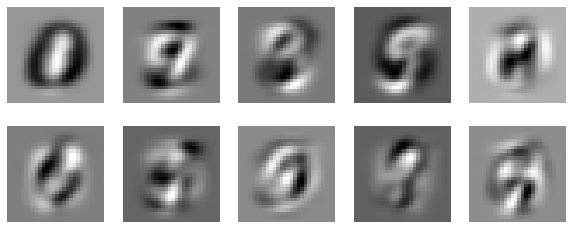

In [16]:
principal = extract_eigen(data_train, 10)
show_image(2, 5, principal)

In [17]:
# (b)

In [18]:
#plot all eigenvalues of the sample covariance matrix 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


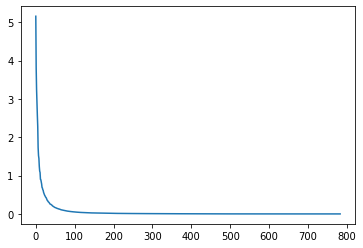

In [19]:
cov = compute_covariance(data_train)
e_values, e_vectors = np.linalg.eig(cov)
plt.plot(sorted(e_values, reverse = True))
plt.show()

In [20]:
# (c)

In [21]:
def project_data(data, principal):
    projection = []
    for d in data:
        vector_projection = []
        for p in principal: 
            vector_projection.append(np.dot(d, p))
        projection.append(vector_projection)
    
    return np.array(projection)

In [22]:
def transform_data(vector, principal):
    trans = np.zeros(len(principal[0]))
    for i in range(len(principal)):
        trans += vector[i] * principal[i]
        
    plt.figure()
    plt.imshow(trans.reshape((28,28)), cmap = "gray")

In [23]:
# We take a point in the test data set, project it onto the first 10 eigenvectors,
# as we have done so far, transform, then display. 

In [24]:
projection = project_data(data_test, principal)

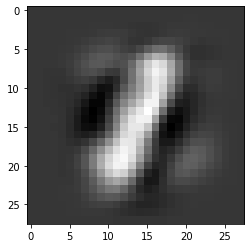

In [25]:
transform_data(projection[0], principal)

In [26]:
#Based on the result, we can tell from common sense that it refers to the number one 

In [27]:
# repeat for several different values of K, the number of principal components. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


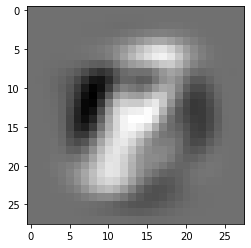

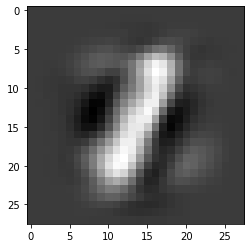

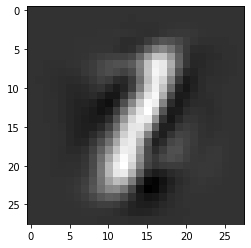

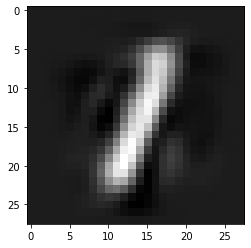

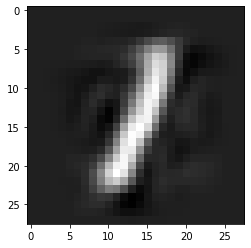

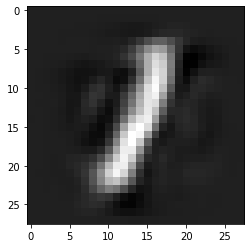

In [28]:
for k in range(5, 31, 5):
    p_c = extract_eigen(data_test, k)
    projection = project_data(data_test, p_c)
    transform_data(projection[0], p_c)

In [29]:
# we can try different data points, fixing m = 10 for fair comparison. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


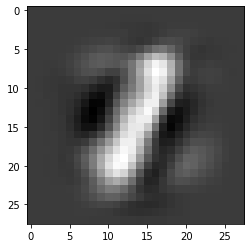

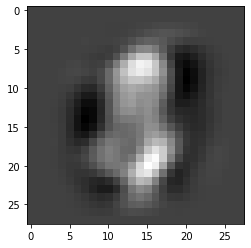

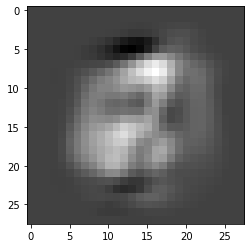

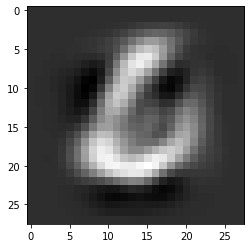

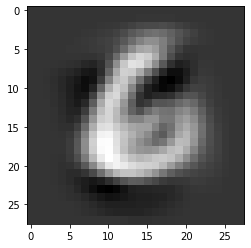

In [30]:
for i in range(5):
    p_c = extract_eigen(data_test, 10)
    projected_data = project_data(data_test, p_c)
    transform_data(projected_data[i], p_c)
    

In [31]:
'''
We can observe that as k increases beyond 10, the image shows better 
and clearer images of the digits. The k -number of principal components- 
value of five however, seems to be not large enough because it is hard 
to make a clear visual identification. When the k-value hits 20, much less
areas of the images are blurred and hence we can visually identify the 
digits at greater ease. We can also describe the region that 
the top principal components are capturing. As k increases, we retrieve better 
distinction between the white and black/gray areas: The white regions become 
whiter/purer and blacker regions become darker. We can infer that the 
highest principal components captures essential information of a data point
in a sense that they retain more information about these boundaries between
black and white. 
'''

'\nWe can observe that as k increases beyond 10, the image shows better \nand clearer images of the digits. The k -number of principal components- \nvalue of five however, seems to be not large enough because it is hard \nto make a clear visual identification. When the k-value hits 20, much less\nareas of the images are blurred and hence we can visually identify the \ndigits at greater ease. We can also describe the region that \nthe top principal components are capturing. As k increases, we retrieve better \ndistinction between the white and black/gray areas: The white regions become \nwhiter/purer and blacker regions become darker. We can infer that the \nhighest principal components captures essential information of a data point\nin a sense that they retain more information about these boundaries between\nblack and white. \n'

In [32]:
#part 2 K-means 

In [33]:
# First, let's try 10 clusters because there are 10 numbers from zero to nine  

In [34]:
kmeans = KMeans(n_clusters = 10, max_iter = 50)
kmeans.fit(data)
centers = kmeans.cluster_centers_

In [35]:
# Let's see how closely the clusters capture the digits 

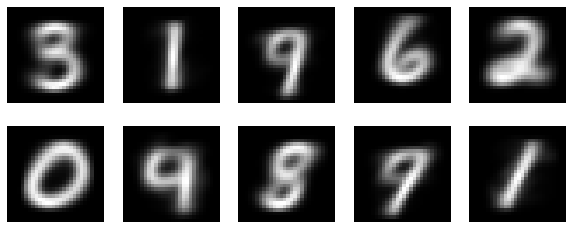

In [36]:
show_image(2, 5, centers)

In [37]:
pre_dic = {}
prediction = kmeans.predict(data)
for i in range(len(data)):
    if prediction[i] not in pre_dic:
        pre_dic[prediction[i]] = []
    pre_dic[prediction[i]].append(labels[i])
    
for c, label in sorted(pre_dic.items()):
    print("cluster number {} : majority {}".format(c, int(mode(label))))

cluster number 0 : majority 3
cluster number 1 : majority 1
cluster number 2 : majority 9
cluster number 3 : majority 6
cluster number 4 : majority 2
cluster number 5 : majority 0
cluster number 6 : majority 4
cluster number 7 : majority 8
cluster number 8 : majority 7
cluster number 9 : majority 1


In [38]:
'''
The results show that the clusters seems to closely represent the digits
1, 2, 3, 4, 6, 7, and 8. Although 5 and 9 are not represented, the kmeans 
algorithm could have decided on boundaries that cut through 7 and 9 which
rendered 9 missing. 5 could have been lost in a similar way. However, 
at least for the digits that are represented, the we can tell from 
the images that one can easily identify the digits without much difficulty. 
'''

'\nThe results show that the clusters seems to closely represent the digits\n1, 2, 3, 4, 6, 7, and 8. Although 5 and 9 are not represented, the kmeans \nalgorithm could have decided on boundaries that cut through 7 and 9 which\nrendered 9 missing. 5 could have been lost in a similar way. However, \nat least for the digits that are represented, the we can tell from \nthe images that one can easily identify the digits without much difficulty. \n'

In [39]:
# Now, lets pull up the first 20 digits that we previously saw and identify their 
# clusters. 

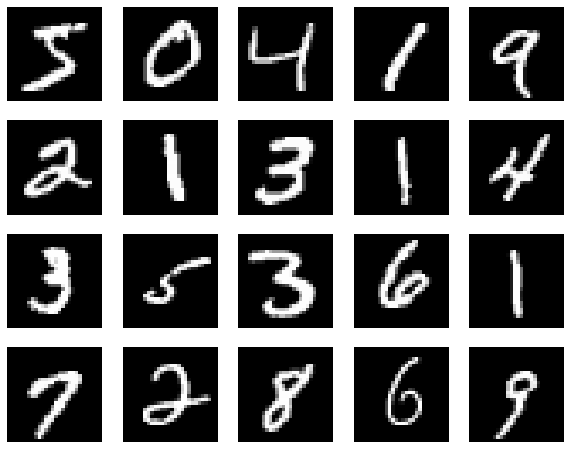

majority 8
majority 0
majority 4
majority 1
majority 9
majority 2
majority 1
majority 8
majority 1
majority 7
majority 8
majority 1
majority 3
majority 6
majority 1
majority 7
majority 2
majority 8
majority 6
majority 7


In [40]:
show_image(4, 5, data[:20])
for i in range(20):
    print("majority {}".format(int(mode(pre_dic[prediction[i]]))))

In [41]:
'''
Although it is not without errors, the clusters seem to adequately capture the
structure of the data quite nicely. As anticipated, the data for number 9 were often
mistakenly treated as the number seven. Fives were captured by a few different clusters. 
Roughly sixteen out of twenty samples were predicted correctly. 
'''

'\nAlthough it is not without errors, the clusters seem to adequately capture the\nstructure of the data quite nicely. As anticipated, the data for number 9 were often\nmistakenly treated as the number seven. Fives were captured by a few different clusters. \nRoughly sixteen out of twenty samples were predicted correctly. \n'

In [42]:
# Part 3 

In [43]:
# (a)

In [44]:
# define a function that constructs the similarity matrix

In [45]:
def construct_similarity(data, h):
    sim = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            sim[i][j] = math.exp(-(np.linalg.norm(data[i] \
                - data[j]))**2 / float(h))
    return sim 
    

In [46]:
# Let's try using one thousand data for shorter computation time

In [47]:
new_data = data[:1000]
new_labels = labels[:1000]

In [48]:
#define a function that constructs the diagonal matrix

In [49]:
def construct_diagonal(sim):
    diag= np.zeros((len(sim), len(sim)))
    for i in range(len(sim)):
        diag[i][i] = sum(sim[i])
    return diag

In [50]:
#define a function that computes laplacian

In [51]:
def compute_laplacian(data, h):
    sim = construct_similarity(data, h)
    diag = construct_diagonal(sim)
    for i in range(len(diag)):
        diag[i][i] = math.pow(diag[i][i], -0.5)
    return np.identity(len(sim)) - np.matmul(np.matmul(diag, sim), diag)

In [52]:
# (b)

In [53]:
#define a function that computes the bottom r eigenvalues, discarding the lowest one

In [54]:
def compute_bottom_e_vectors(data, h ,r):
    L = compute_laplacian(data, h)
    e_value, e_vector = np.linalg.eig(L)
    bottom_e_value = sorted(e_value)[1: r + 1]
    e_value = list(e_value)
    bottom_e_vector = []
    bottom_e_vector_index = []
    for e in bottom_e_value:
        index = e_value.index(e)
        bottom_e_vector.append(e_vector[:, index])
        bottom_e_vector_index.append(index)
    
    return np.array(bottom_e_vector).T, bottom_e_vector_index, bottom_e_value

In [55]:
# define a function that runs k_means 

In [56]:
def run_kmeans(data, h, r, n):
    e_vector_matrix, e_vector_index, e_values = compute_bottom_e_vectors(data, h ,r)
    kmeans = KMeans(n_clusters = n, max_iter = 50)
    kmeans.fit(e_vector_matrix)
    return kmeans, e_vector_matrix, e_vector_index, e_values

In [57]:
# Run k_means. After trying many different values of h, the bandwidth, I decided on 50 

In [58]:
kmeans, e_vector_matrix, e_vector_index, e_values = run_kmeans(new_data, 50, 3, 10)

In [59]:
# reduce the dimensions 

In [60]:
e_vectors_ = e_vector_matrix[:, 1:3]
e_vector_index = e_vector_index[1:3]
e_values_ = e_values[1:3]

In [61]:
# We need to find the first three digits - 0, 1, 2 - embedded with v2 v3

In [62]:
# but first, let's define a function that embeds eigenvectors for certain digits

In [63]:
def embed_digits(digit, e_vectors):
    indices = []
    for i in range(len(e_vectors_)):
        if new_labels[i] == float(digit):
            indices.append(i)
        
    return indices, e_vectors[indices, :]

In [64]:
indice_one, ones = embed_digits(1.0, e_vectors_)
indice_two, twos = embed_digits(2.0, e_vectors_)
indice_zero, zeros = embed_digits(0.0, e_vectors_)
one_two_zero = np.concatenate((ones, twos, zeros), axis = 0)

In [65]:
# run k_means on this 2d data and show the clusters 

In [66]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(one_two_zero)
prediction = kmeans.predict(one_two_zero)
centers = kmeans.cluster_centers_ 

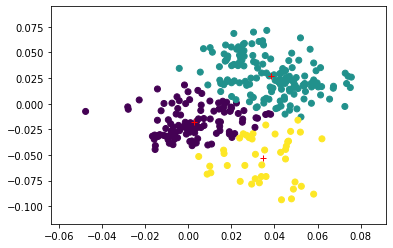

In [67]:
x, y = zip(*one_two_zero)
center_x, center_y = zip(*centers)
plt.scatter(x, y, c = prediction)
plt.plot(center_x, center_y, "r+")
plt.show()

In [68]:
# (c)

In [69]:
# Sample zeros that weren't in the training set. We pick the next thousand data and 
# filter data that are labeled as zero 

In [70]:
next_data = data[1000:2000]
next_labels = labels[1000:2000]
indices = []
for i in range(len(next_data)):
    if next_labels[i] == 0.0:
        indices.append(i)

In [71]:
L = compute_laplacian(new_data, 50)
e_val, e_vec = np.linalg.eig(L)

In [72]:
#Let's redefine Gauss Kernel K as in the slide  

In [73]:
def gauss_kernel(x, y, h):
    return np.exp((-np.linalg.norm(x - y) ** 2 / h))

In [74]:
# define a function that computes the normalized kernel 

In [75]:
def compute_k(vector, data, diag, e_vec, e_val):
    n = data.shape[0]
    d_x = np.zeros((n, 1))
    for i, d in enumerate(data):
        d_x[i] = gauss_kernel(vector, d, 50)
    norm = np.sqrt(np.mean(d_x))
    K_x = np.zeros((n, 1))
    square_n = np.sqrt(n)
    for i, d in enumerate(data):
        K_x[i] = d_x[i] * diag[i ,i] / (square_n * norm)
    e_vec_t = e_vec.T
    K = e_vec_t.shape[1]
    c_extension = np.zeros(K)
    for k, v in enumerate(e_vec_t):
        c_extension[k] = np.dot(v, K_x)/ e_val[k]
    return c_extension

In [76]:
sim = construct_similarity(new_data, 50)
diag = construct_diagonal(sim)
for i in range(len(diag)):
    diag[i][i] = math.pow(diag[i][i], -0.5)

In [77]:
c_extension = np.zeros((len(new_data), len(next_data)))
for j in range(len(next_data)):
    c_extension[j, : ] = compute_k(next_data[j], new_data, diag, e_vec, e_val)

In [79]:
c1 = c_extension[: , e_vector_index]
c2 = c1[indices, :]

In [80]:
# Now, let's see where the new sample of zeros are embedded. 
# We can also plot zeros of the training data to see if 
# the computation of the continuous extension captured the data structure
# nicely. 

<function matplotlib.pyplot.show(*args, **kw)>

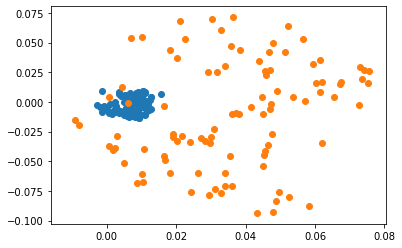

In [81]:
x, y = zip(*c2)
x1, y1 = zip(*zeros)
plt.scatter(x, y)
plt.scatter(x1, y1)
plt.show

In [82]:
# We can see that the new sample of zeros are clustered around each other,
# and the cluster lies within the cluster of zeros of the training data. 
# Using the training data, we were able to compute a continuous extension 
# that captures the data structure of new samples. 

In [83]:
# Part 4

In [84]:
# (a)

In [85]:
LR = LogisticRegression(fit_intercept = True, C = 100000, penalty = 'l2', \
        multi_class = "multinomial", solver = "lbfgs")

In [86]:
# train the model on the training set 

In [87]:
train_set = center_data(data_train)

In [88]:
LR.fit(train_set, label_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# evaluate the model on the development set 

In [90]:
dev_set = center_data(data_dev)
prediction = LR.predict(dev_set)

In [91]:
# Calculating the error rate

In [92]:
1 - accuracy_score(label_dev, prediction)

0.08721428571428569

In [93]:
# Using the principal components derived above, we predict the label for new 
# data point. 

In [94]:
principal = extract_eigen(data_train, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [95]:
projection_train = project_data(train_set, principal)
projection_dev = project_data(dev_set, principal)

In [96]:
LR1 = LogisticRegression(fit_intercept = True, C = 100000, penalty = "l2", \
                       multi_class = "multinomial", solver = "lbfgs")

In [97]:
LR1.fit(projection_train, label_train)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# prediction of the label for new data

In [99]:
LR1.predict(projection_dev)

array([2., 2., 1., ..., 4., 2., 2.], dtype=float32)

In [100]:
# (b)

In [101]:
# Create a function that trains the regression model on training data 
# using the top k principal components. Then it predicts the labels 
# of the development data and compute the error rate. 

In [102]:
def compute_error(k):
    principal = extract_eigen(data_train, k)
    projection_train = project_data(train_set, principal)
    projection_dev = project_data(dev_set, principal)
    LR = LogisticRegression(fit_intercept = True, C = 100000, penalty = 'l2', 
                       multi_class = "multinomial", solver = 'lbfgs')
    LR.fit(projection_train, label_train)
    prediction = LR.predict(projection_dev)
    return 1 - accuracy_score(label_dev, prediction)

In [103]:
# Plotting the error as a function of k. Let's try k from 1 to 100 and see how the 
# error changes 

In [104]:
error = []
for k in range(1, 101):
    e = compute_error(k)
    error.append(e)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

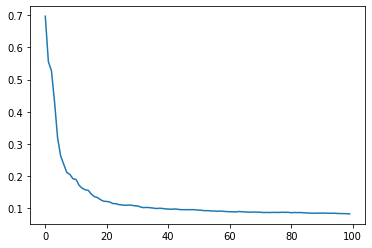

In [105]:
plt.plot(error)
plt.show()

In [106]:
# The graph shows that as k increases, the error decreases as well. 
# However, when k reaches around 60, the rate of decrease slows down
# significantly. The first 59 principal components seem to perform quite
# well in decreasing the error, but after that the less important
# principal components tend to contribute less to the performance. 

In [107]:
# part (c)

In [108]:
# pick k that minimize the error on the development data

In [117]:
e_min = math.inf
k_min = None
for k in range(1, 101):
    error = compute_error(k)
    if error < e_min:
        e_min = error 
        k_min = k

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (statu

In [118]:
k_min

100

In [119]:
both_data = np.concatenate((data_train, data_dev), axis = 0)
both_label = np.concatenate((label_train, label_dev), axis = 0)
print(both_data.shape)
print(both_label.shape)

(56000, 784)
(56000,)


In [120]:
#compute error rate on testing data

In [121]:
principal = extract_eigen(both_data, k_min)
both_data_set = center_data(both_data)
test_set = center_data(data_test)
projection_both = project_data(both_data_set, principal)
projection_test = project_data(test_set, principal)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [122]:
# retain multinomial logistic regression model

In [123]:
LR2 = LogisticRegression(fit_intercept = True, C = 100000, penalty = "l2" , \
                         multi_class = "multinomial", solver = "lbfgs")

LR2.fit(both_data_set, both_label)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
prediction = LR2.predict(test_set)

In [125]:
1 - accuracy_score(label_test, prediction)

0.07999999999999996

In [126]:
'''
The error rate using k that minimizes the error (k = 100) on development data did not change 
the error rate significantly. However, we did observe some improvement: (0.087 - 0.079) 
We can conclude that logistic regression with k = 100 and the logistic regression 
with raw features both have roughly similar levels of accuracy although the former 
proved to be slightly more accurate. The remaining principal components not included 
in the selection of k principal components could have induced some noise that 
ironically disturbed the accuracy of the model. As a result, we were able to achieve higher accuracy 
with only k principal components. 
'''

'\nThe error rate using k that minimizes the error (k = 100) on development data did not change \nthe error rate significantly. However, we did observe some improvement: (0.087 - 0.079) \nWe can conclude that logistic regression with k = 100 and the logistic regression \nwith raw features both have roughly similar levels of accuracy although the former \nproved to be slightly more accurate. The remaining principal components not included \nin the selection of k principal components could have induced some noise that \nironically disturbed the accuracy of the model. As a result, we were able to achieve higher accuracy \nwith only k principal components. \n'